In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import shap
from sklearn.datasets import dump_svmlight_file
import numpy as np
import matplotlib.pylab as pl


In [2]:

tr_comb='train_oct_fund_bm3.csv'
tr_svm='svmlight_tr_oct_fund_bm3.dat'

val_comb='xgboost_val_oct_fund_bm3.csv'
val_svm='svmlight_val_oct_fund_bm3.dat'


te_comb='test_oct_fund_bm3.csv'
te_svm='svmlight_test_oct_fund_bm3.dat'

dbm3train = xgb.DMatrix(tr_svm)
dbm3val = xgb.DMatrix(val_svm)
dbm3test=xgb.DMatrix(te_svm)

params = {
    "eta": 0.001,
    "objective": "binary:logistic",
    "subsample": 0.7,
    "eval_metric": ["logloss"]
}
model = xgb.train(params, dbm3train, 2000, evals = [(dbm3val, "val")], verbose_eval=100, early_stopping_rounds=20)

[12:59:12] 2202x145 matrix with 313909 entries loaded from /home/parmita/glaucoma_results/gl_nm/OCT_data/densenet_16/svmlight_tr_oct_fund_bm3.dat
[12:59:12] 177x145 matrix with 25060 entries loaded from /home/parmita/glaucoma_results/gl_nm/OCT_data/densenet_16/svmlight_val_oct_fund_bm3.dat
[12:59:12] 87x145 matrix with 12422 entries loaded from /home/parmita/glaucoma_results/gl_nm/OCT_data/densenet_16/svmlight_test_clipped_oct_fund_bm3.dat
[0]	val-logloss:0.693061
Will train until val-logloss hasn't improved in 20 rounds.
[100]	val-logloss:0.682513
[200]	val-logloss:0.674091
[300]	val-logloss:0.667173
[400]	val-logloss:0.66168
[500]	val-logloss:0.657091
[600]	val-logloss:0.653477
[700]	val-logloss:0.650499
[800]	val-logloss:0.648771
[900]	val-logloss:0.647155
Stopping. Best iteration:
[966]	val-logloss:0.646198



In [3]:
explainer = shap.TreeExplainer(model)
tr=pd.read_table(tr_comb)
val=pd.read_table(val_comb)
te=pd.read_table(te_comb) 
x=pd.concat((tr,te),axis=0)
name=x.pop('name')
cs=x.pop('p_0')
cs=x.pop('p')
cs=x.pop('c')
cs=x.pop('fn')
cs=x.pop('eid')
cs=x.pop('eye')
cs=x.pop('d1')
cs=x.pop('d2')
cs=x.pop('labels')
y=x.pop('l')
shap_values = explainer.shap_values(x)

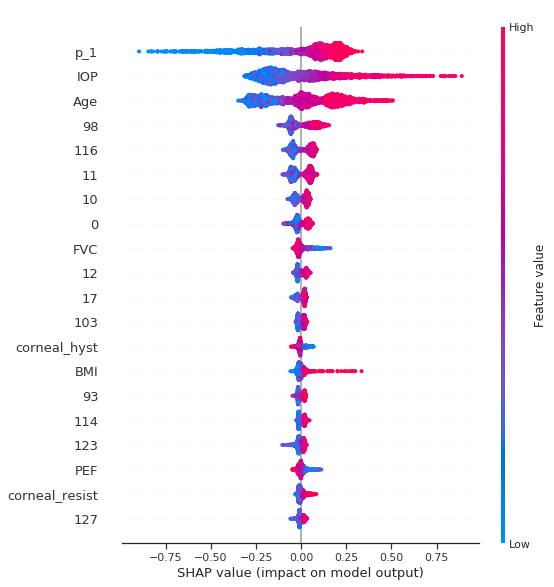

In [6]:
shap.summary_plot(shap_values, x)

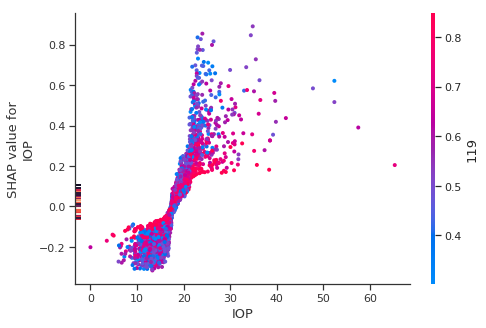

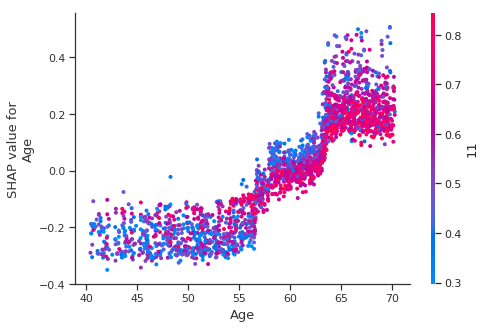

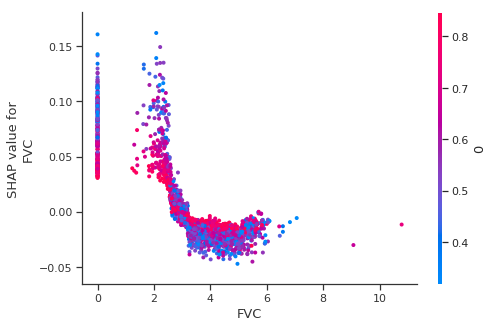

In [11]:
dependence_plot("IOP", shap_values, x)
dependence_plot("Age", shap_values, x)
dependence_plot("FVC", shap_values, x)